In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
!pip install opencv-python-headless
!pip install tensorflow

In [ ]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout


In [ ]:
def load_data(data_dir):
    categories = ["Drowsy", "Non Drowsy"]
    data = []

    for label, category in enumerate(categories):
        folder_path = os.path.join(data_dir, category)
        for img_name in os.listdir(folder_path):
            img_path = os.path.join(folder_path, img_name)
            img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
            img = cv2.resize(img, (64, 64))
            data.append((img, label))

    X = []
    y = []
    for feature, label in data:
        X.append(feature)
        y.append(label)

    return X, y



In [ ]:
# Veri yolunu belirt
data_path = "/content/drive/MyDrive/Colab Notebooks/driver-drowsiness-detection"

# Veriyi yükle
X, y = load_data(data_path)

# Hatalı boyut varsa uyarı ver (kontrol)
for i, img in enumerate(X):
    if img.shape != (64, 64):
        print(f"Hatalı boyut: {i} -> {img.shape}")

# Normalize ve yeniden şekillendir
X = np.array(X).reshape(-1, 64, 64, 1).astype("float32") / 255.0
y = np.array(y)

# Eğitim ve test setlerine ayır
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


X_train şekli: (160, 64, 64, 1)
y_train şekli: (160,)
X_test şekli: (40, 64, 64, 1)
y_test şekli: (40,)


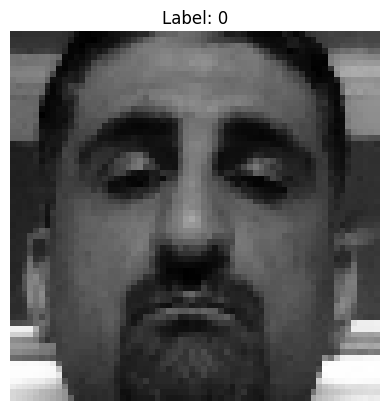

In [ ]:
print("X_train şekli:", X_train.shape)
print("y_train şekli:", y_train.shape)
print("X_test şekli:", X_test.shape)
print("y_test şekli:", y_test.shape)

# Örnek görsel göster
plt.imshow(X_train[0].reshape(64, 64), cmap='gray')
plt.title(f"Label: {y_train[0]}")
plt.axis('off')
plt.show()


In [ ]:
# Derin öğrenme modeli tanımla
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(64, 64, 1)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(64, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')  # Binary classification
])

# Derleme
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

# Eğit
history = model.fit(X_train, y_train, epochs=30, batch_size=32, validation_split=0.1)

# Modeli kaydet
model.save("cnn_model.h5")
print("✅ Model başarıyla kaydedildi.")


Epoch 1/30


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


5/5 ━━━━━━━━━━━━━━━━━━━━ 4s 348ms/step - accuracy: 0.7367 - loss: 0.4652 - val_accuracy: 1.0000 - val_loss: 0.0056
Epoch 2/30
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 1.0000 - loss: 0.0116 - val_accuracy: 1.0000 - val_loss: 5.3625e-07
Epoch 3/30
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 1.0000 - loss: 1.9904e-04 - val_accuracy: 1.0000 - val_loss: 5.2306e-11
Epoch 4/30
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 1.0000 - loss: 5.2066e-07 - val_accuracy: 1.0000 - val_loss: 3.6039e-14
Epoch 5/30
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 1.0000 - loss: 2.6032e-07 - val_accuracy: 1.0000 - val_loss: 1.9059e-16
Epoch 6/30
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 1.0000 - loss: 6.9802e-07 - val_accuracy: 1.0000 - val_loss: 5.2792e-18
Epoch 7/30
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 1.0000 - loss: 1.4444e-08 - val_accuracy: 1.0000 - val_loss: 4.9179e-19
Epoch 8/30
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 1.0000 - loss: 8.8251e-09 - va

✅ Model başarıyla kaydedildi.


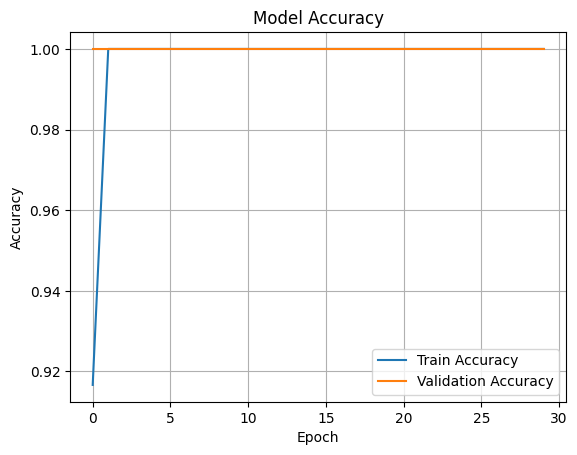

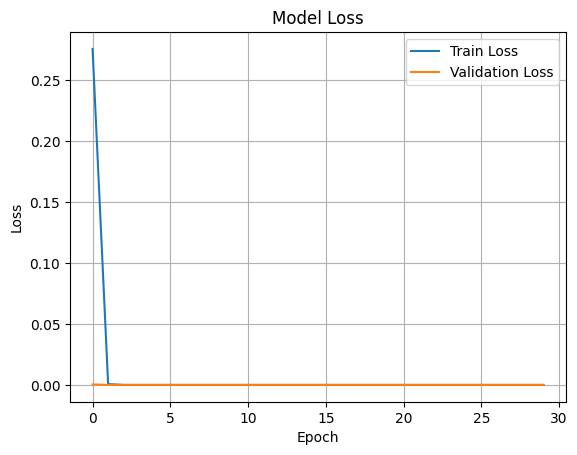

In [ ]:
import matplotlib.pyplot as plt

# Accuracy Grafiği
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()

# Loss Grafiği
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()


In [ ]:
model.save('model_drowsiness_30epoch.h5')


In [ ]:
correct = 0
incorrect = 0
correct_images = []
incorrect_images = []

for i in range(len(X_test)):
    img = X_test[i]
    label = y_test[i]
    pred = model.predict(np.expand_dims(img, axis=0))[0][0]

    pred_class = 1 if pred > 0.5 else 0

    if pred_class == label and correct < 3:
        correct_images.append((img, label, pred))
        correct += 1
    elif pred_class != label and incorrect < 3:
        incorrect_images.append((img, label, pred))
        incorrect += 1

    if correct == 3 and incorrect == 3:
        break


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 192ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━

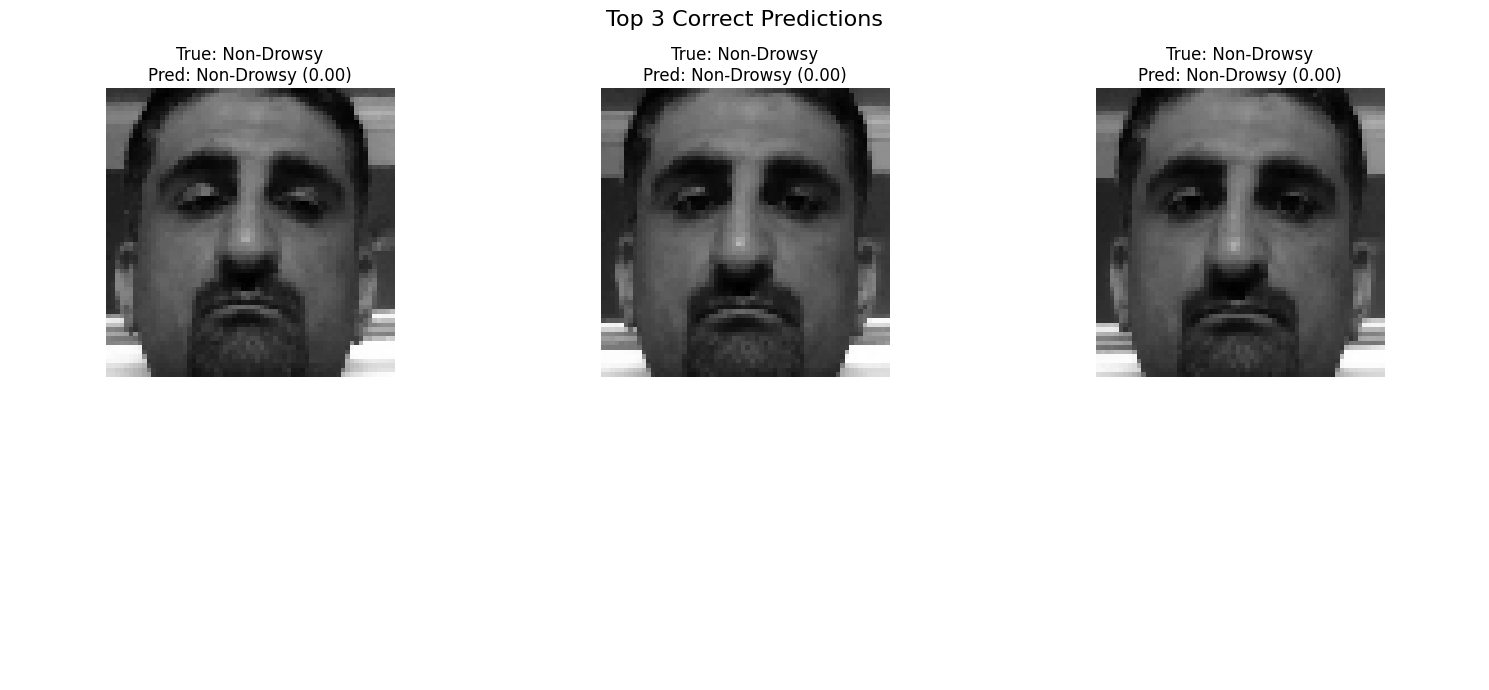

In [ ]:
import matplotlib.pyplot as plt

fig, axs = plt.subplots(2, 3, figsize=(15, 7))
fig.suptitle("Top 3 Correct Predictions", fontsize=16)

# Doğru tahminleri göster
for i in range(min(3, len(correct_images))):
    img, label, pred = correct_images[i]
    axs[0, i].imshow(img.reshape(64, 64), cmap='gray')
    axs[0, i].axis('off')
    axs[0, i].set_title(f"True: {'Drowsy' if label==1 else 'Non-Drowsy'}\nPred: {'Drowsy' if pred > 0.5 else 'Non-Drowsy'} ({pred:.2f})")

# Yanlış tahminleri göster (varsa)
if len(incorrect_images) == 0:
    for i in range(3):
        axs[1, i].axis('off')
else:
    for i in range(min(3, len(incorrect_images))):
        img, label, pred = incorrect_images[i]
        axs[1, i].imshow(img.reshape(64, 64), cmap='gray')
        axs[1, i].axis('off')
        axs[1, i].set_title(f"True: {'Drowsy' if label==1 else 'Non-Drowsy'}\nPred: {'Drowsy' if pred > 0.5 else 'Non-Drowsy'} ({pred:.2f})")

plt.tight_layout()
plt.show()



In [ ]:
if len(incorrect_images) > 0:
    fig, axs = plt.subplots(2, 3, figsize=(15, 7))
    fig.suptitle("Top 3 Correct and Incorrect Predictions", fontsize=16)

    for i in range(3):
        img, label, pred = correct_images[i]
        axs[0, i].imshow(img.reshape(64, 64), cmap='gray')
        axs[0, i].axis('off')
        axs[0, i].set_title(f"True: {'Drowsy' if label==1 else 'Non-Drowsy'}\nPred: {'Drowsy' if pred > 0.5 else 'Non-Drowsy'} ({pred:.2f})")

    for i in range(3):
        img, label, pred = incorrect_images[i]
        axs[1, i].imshow(img.reshape(64, 64), cmap='gray')
        axs[1, i].axis('off')
        axs[1, i].set_title(f"True: {'Drowsy' if label==1 else 'Non-Drowsy'}\nPred: {'Drowsy' if pred > 0.5 else 'Non-Drowsy'} ({pred:.2f})")

    plt.tight_layout()
    plt.show()
else:
    print("The model did not make any incorrect predictions.")



The model did not make any incorrect predictions.


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
Unique values in y_test: [0]
Unique values in y_pred: [0]

Classification Report:
              precision    recall  f1-score   support

  Non-Drowsy       1.00      1.00      1.00        40

    accuracy                           1.00        40
   macro avg       1.00      1.00      1.00        40
weighted avg       1.00      1.00      1.00        40



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:407: UserWarning: A single label was found in 'y_true' and 'y_pred'. For the confusion matrix to have the correct shape, use the 'labels' parameter to pass all known labels.
  warnings.warn(


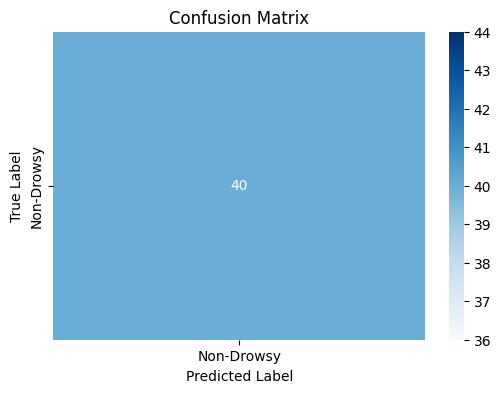


Accuracy: 1.00


In [ ]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt

# Predict the test set
y_pred_probs = model.predict(x_test)
y_pred = (y_pred_probs > 0.5).astype("int32")

# Check how many unique classes exist
print("Unique values in y_test:", np.unique(y_test))
print("Unique values in y_pred:", np.unique(y_pred))

# Classification report — with dynamic label check
labels = sorted(list(set(np.unique(y_test)).union(np.unique(y_pred))))

print("\nClassification Report:")
print(classification_report(y_test, y_pred, labels=labels, target_names=["Non-Drowsy", "Drowsy"][:len(labels)]))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred, labels=labels)
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["Non-Drowsy", "Drowsy"][:len(labels)], yticklabels=["Non-Drowsy", "Drowsy"][:len(labels)])
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()

# Accuracy
acc = accuracy_score(y_test, y_pred)
print(f"\nAccuracy: {acc:.2f}")
